# Society Score Regression Analysis Report

### Importing pandas, numpy, matplotlib and seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

### importing the dataset

In [2]:
originalData = pd.read_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")
originalData.head()

Order  Property Id                                 Property Name  \
0      1        13286                                       201/205   
1      2        28400                    NYP Columbia (West Campus)   
2      3      4778226                                 MSCHoNY North   
3      4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4      5      4778288                               Neuro Institute   

  Parent Property Id        Parent Property Name BBL - 10 digits  \
0              13286                     201/205      1013160001   
1              28400  NYP Columbia (West Campus)      1021380040   
2              28400  NYP Columbia (West Campus)      1021380030   
3              28400  NYP Columbia (West Campus)      1021390001   
4              28400  NYP Columbia (West Campus)      1021390085   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   
2                                   1-02138-0030   
3                                   1-02139-0001   
4                                   1-02139-0085   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2                                            1063380   
3                                   1087281; 1076746   
4                                            1063403   

  Address 1 (self-reported)                Address 2  ...  \
0  201/205  East  42nd  st.            Not Available  ...   
1          622 168th Street            Not Available  ...   
2             3975 Broadway            Not Available  ...   
3   161 Fort Washington Ave  177 Fort Washington Ave  ...   
4     710 West 168th Street            Not Available  ...   

  Source EUI (kBtu/ft²)            Release Date Water Required?  \
0                 619.4  05/01/2017 05:32:03 PM              No   
1                 404.3  04/27/2017 11:23:27 AM              No   
2         Not Available  04/27/2017 11:23:27 AM              No   
3         Not Available  04/27/2017 11:23:27 AM              No   
4         Not Available  04/27/2017 11:23:27 AM              No   

  DOF Benchmarking Submission Status   Latitude  Longitude Community Board  \
0                      In Compliance  40.750791 -73.973963             6.0   
1                      In Compliance  40.841402 -73.942568            12.0   
2                      In Compliance  40.840427 -73.940249            12.0   
3                      In Compliance  40.840746 -73.942854            12.0   
4                      In Compliance  40.841559 -73.942528            12.0   

  Council District Census Tract  \
0              4.0         88.0   
1             10.0        251.0   
2             10.0        251.0   
3             10.0        255.0   
4             10.0        255.0   

                                                 NTA  
0  Turtle Bay-East Midtown                       ...  
1  Washington Heights South                      ...  
2  Washington Heights South                      ...  
3  Washington Heights South                      ...  
4  Washington Heights South                      ...  

[5 rows x 60 columns]

### description of the data set

In [3]:
originalData.describe()

Order   Property Id  DOF Gross Floor Area    Year Built  \
count  11746.000000  1.174600e+04          1.162800e+04  11746.000000   
mean    7185.759578  3.642958e+06          1.732695e+05   1948.738379   
std     4323.859984  1.049070e+06          3.367055e+05     30.576386   
min        1.000000  7.365000e+03          5.002800e+04   1600.000000   
25%     3428.250000  2.747222e+06          6.524000e+04   1927.000000   
50%     6986.500000  3.236404e+06          9.313850e+04   1941.000000   
75%    11054.500000  4.409092e+06          1.596140e+05   1966.000000   
max    14993.000000  5.991312e+06          1.354011e+07   2019.000000   

       Number of Buildings - Self-reported     Occupancy  \
count                         11746.000000  11746.000000   
mean                              1.289971     98.762557   
std                               4.017484      7.501603   
min                               0.000000      0.000000   
25%                               1.000000    100.000000   
50%                               1.000000    100.000000   
75%                               1.000000    100.000000   
max                             161.000000    100.000000   

       Property GFA - Self-Reported (ft²)     Latitude    Longitude  \
count                        1.174600e+04  9483.000000  9483.000000   
mean                         1.673739e+05    40.754379   -73.957057   
std                          3.189238e+05     0.080120     0.046337   
min                          0.000000e+00    40.516065   -74.243582   
25%                          6.699400e+04    40.707226   -73.984662   
50%                          9.408000e+04    40.759130   -73.962810   
75%                          1.584140e+05    40.817623   -73.932443   
max                          1.421712e+07    40.912869   -73.715543   

       Community Board  Council District   Census Tract  
count      9483.000000       9483.000000    9483.000000  
mean          7.140673         15.771275    4977.596647  
std           3.954129         15.674375   13520.422990  
min           1.000000          1.000000       1.000000  
25%           4.000000          4.000000     100.000000  
50%           7.000000          9.000000     201.000000  
75%           9.000000         33.000000     531.500000  
max          56.000000         51.000000  155101.000000

In [4]:
originalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

### eleminating the "Not Available"

In [5]:
originalData.replace('Not Available', np.nan, inplace=True)
originalData.replace('Not Applicable: Standalone Property', np.nan, inplace=True)


In [6]:
originalData.head()

Order  Property Id                                 Property Name  \
0      1        13286                                       201/205   
1      2        28400                    NYP Columbia (West Campus)   
2      3      4778226                                 MSCHoNY North   
3      4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4      5      4778288                               Neuro Institute   

  Parent Property Id        Parent Property Name BBL - 10 digits  \
0              13286                     201/205      1013160001   
1              28400  NYP Columbia (West Campus)      1021380040   
2              28400  NYP Columbia (West Campus)      1021380030   
3              28400  NYP Columbia (West Campus)      1021390001   
4              28400  NYP Columbia (West Campus)      1021390085   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   
2                                   1-02138-0030   
3                                   1-02139-0001   
4                                   1-02139-0085   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2                                            1063380   
3                                   1087281; 1076746   
4                                            1063403   

  Address 1 (self-reported)                Address 2  ...  \
0  201/205  East  42nd  st.                      NaN  ...   
1          622 168th Street                      NaN  ...   
2             3975 Broadway                      NaN  ...   
3   161 Fort Washington Ave  177 Fort Washington Ave  ...   
4     710 West 168th Street                      NaN  ...   

  Source EUI (kBtu/ft²)            Release Date Water Required?  \
0                 619.4  05/01/2017 05:32:03 PM              No   
1                 404.3  04/27/2017 11:23:27 AM              No   
2                   NaN  04/27/2017 11:23:27 AM              No   
3                   NaN  04/27/2017 11:23:27 AM              No   
4                   NaN  04/27/2017 11:23:27 AM              No   

  DOF Benchmarking Submission Status   Latitude  Longitude Community Board  \
0                      In Compliance  40.750791 -73.973963             6.0   
1                      In Compliance  40.841402 -73.942568            12.0   
2                      In Compliance  40.840427 -73.940249            12.0   
3                      In Compliance  40.840746 -73.942854            12.0   
4                      In Compliance  40.841559 -73.942528            12.0   

  Council District Census Tract  \
0              4.0         88.0   
1             10.0        251.0   
2             10.0        251.0   
3             10.0        255.0   
4             10.0        255.0   

                                                 NTA  
0  Turtle Bay-East Midtown                       ...  
1  Washington Heights South                      ...  
2  Washington Heights South                      ...  
3  Washington Heights South                      ...  
4  Washington Heights South                      ...  

[5 rows x 60 columns]

### here we take a threshold to consider values i.e., eliminating columns which have more than 60% null values

In [7]:
originalData.isna().sum()

Order                                                             0
Property Id                                                       0
Property Name                                                     0
Parent Property Id                                            11324
Parent Property Name                                          11324
BBL - 10 digits                                                  11
NYC Borough, Block and Lot (BBL) self-reported                   11
NYC Building Identification Number (BIN)                        162
Address 1 (self-reported)                                         0
Address 2                                                     11539
Postal Code                                                       0
Street Number                                                   124
Street Name                                                     122
Borough                                                         118
DOF Gross Floor Area                            

In [8]:
missing_per=originalData.isnull().sum()/len(originalData) * 100
missing_per

Order                                                          0.000000
Property Id                                                    0.000000
Property Name                                                  0.000000
Parent Property Id                                            96.407288
Parent Property Name                                          96.407288
BBL - 10 digits                                                0.093649
NYC Borough, Block and Lot (BBL) self-reported                 0.093649
NYC Building Identification Number (BIN)                       1.379193
Address 1 (self-reported)                                      0.000000
Address 2                                                     98.237698
Postal Code                                                    0.000000
Street Number                                                  1.055679
Street Name                                                    1.038651
Borough                                                        1

In [9]:
originalData.Order.nunique() # no repetition so deleted

11746

In [10]:
originalData['Property Id'].nunique()# no repititions so deleted

11746

In [11]:
originalData['Property Name'].nunique()# name has no relationship with energy utilisation so deleted

11740

In [12]:
originalData['Parent Property Id'].nunique() # numerical value will be useful

101

In [13]:
originalData['Parent Property Name'].nunique()# taken care by Parent Property Id so deleted

102

In [14]:
# BBL is same as NYC Borough so NYC Borough and also block and lot BBL self reported so both are to be deleted

In [15]:
originalData['NYC Building Identification Number (BIN)'].nunique() # useful data to be imputed with mode

11507

In [16]:
# address irrelevant so to be deleted,also self reported, address 2
# postal code is important so left as is for further processing
# street number is kept as is as it might be associated with energy utilization as per the distribution
# Street name not required
# borough taken care by BBL number so to be deleted
# DOF gross area => to be imputed as it is an important parameter
# Primary Property Type - Self Selected to be numericalised as per category[55 types] this takes care of Largest Property use type also
# List of all properties.., not reqd for simplicity
# So are 2nd and 3rd
# Year built to be kept as it is
# Number of Buildings - Self-reported to be kept as it is
# Occupancy to be kept as it is
# Metered Areas (Energy) to be imputed with average
# Metered Areas  (Water) to be imputed with average
# ENERGY STAR Score kept as it is % cross checking required %%%%%%%%%%%%%%%%%%
# Site EUI (kBtu/ft²) to be imputed with average
# Weather Normalized Site EUI (kBtu/ft²) impute with average
# Weather Normalized Site Electricity Intensity (kWh/ft²) impute with average
# Weather Normalized Site Natural Gas Intensity (therms/ft²) impute with average
# Weather Normalized Source EUI (kBtu/ft²) impute with average
# directly jumped to Natural Gas Use (kBtu) as all other columns have very high null values to to be deleted
# Natural Gas Use (kBtu) impute with average
# Electricity Use - Grid Purchase (kBtu) to be imputed with average
# Weather Normalized Site Electricity (kWh) to be imputed with average
# Weather Normalized Site Natural Gas Use (therms) impute with average
# Total GHG Emissions (Metric Tons CO2e) impute with average
# Direct GHG Emissions (Metric Tons CO2e) impute with average
# Indirect GHG Emissions (Metric Tons CO2e) impute with average
# Property GFA - Self-Reported (ft²) already reported in property area so deleted
# Water Use (All Water Sources) (kgal) imputed with mode as the median is more apt here
# Water Intensity (All Water Sources) (gal/ft²)  already taken care with water use so to be deleted
# Source EUI (kBtu/ft²) to be imputed with average
# Release Date important parameter to be kept as is .., as it tells the date of reporting
# Water Required? to be imputed with mode as the missing data is only 1% it may not make much impact also to be transformed to numerical values
# DOF Benchmarking Submission Status all are same so drop
# Census Tract to be imputed

# rest all to be deleted


In [17]:
originalData.nunique()

Order                                                         11746
Property Id                                                   11746
Property Name                                                 11740
Parent Property Id                                              101
Parent Property Name                                            102
BBL - 10 digits                                               11580
NYC Borough, Block and Lot (BBL) self-reported                11581
NYC Building Identification Number (BIN)                      11507
Address 1 (self-reported)                                     11645
Address 2                                                       176
Postal Code                                                     286
Street Number                                                  4198
Street Name                                                    2024
Borough                                                           5
DOF Gross Floor Area                            

In [18]:
#Filtering based on the above parameters we get the below dataframe

In [19]:
col_names=(['Parent Property Id',
        'BBL - 10 digits',
       'NYC Building Identification Number (BIN)',
        'Postal Code', 'Street Number',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
        'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)',
       'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       'Water Use (All Water Sources) (kgal)',
       'Source EUI (kBtu/ft²)', 'Release Date', 'Water Required?',
       'Community Board', 'Council District', 'Census Tract'])
X_refined=originalData[col_names]
X_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 32 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Parent Property Id                                          422 non-null    object 
 1   BBL - 10 digits                                             11735 non-null  object 
 2   NYC Building Identification Number (BIN)                    11584 non-null  object 
 3   Postal Code                                                 11746 non-null  object 
 4   Street Number                                               11622 non-null  object 
 5   DOF Gross Floor Area                                        11628 non-null  float64
 6   Primary Property Type - Self Selected                       11746 non-null  object 
 7   Year Built                                                  11746 non-null  int64  
 

### Imputing and transforming the above foresaid data columns

In [20]:
X_refined['Primary Property Type - Self Selected'] = pd.factorize(X_refined['Primary Property Type - Self Selected'])[0] + 1

C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\3329832618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Primary Property Type - Self Selected'] = pd.factorize(X_refined['Primary Property Type - Self Selected'])[0] + 1


In [21]:
X_refined['NYC Building Identification Number (BIN)'].fillna(X_refined['NYC Building Identification Number (BIN)'].mode().iloc[0], inplace=True)

C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\1963351134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['NYC Building Identification Number (BIN)'].fillna(X_refined['NYC Building Identification Number (BIN)'].mode().iloc[0], inplace=True)


In [22]:
X_refined['Street Number'].fillna(X_refined['Street Number'].mode().iloc[0], inplace=True)


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\1659480226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Street Number'].fillna(X_refined['Street Number'].mode().iloc[0], inplace=True)


In [23]:
X_refined['DOF Gross Floor Area'].fillna(X_refined['DOF Gross Floor Area'].mode().iloc[0], inplace=True)


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\1510768704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['DOF Gross Floor Area'].fillna(X_refined['DOF Gross Floor Area'].mode().iloc[0], inplace=True)


In [24]:
X_refined['Metered Areas (Energy)'] = pd.factorize(X_refined['Metered Areas (Energy)'])[0] + 1
X_refined['Metered Areas (Energy)'].head()

C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\3762563407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Metered Areas (Energy)'] = pd.factorize(X_refined['Metered Areas (Energy)'])[0] + 1


0    1
1    1
2    0
3    0
4    0
Name: Metered Areas (Energy), dtype: int64

In [25]:
X_refined['Metered Areas  (Water)'] = pd.factorize(X_refined['Metered Areas  (Water)'])[0] + 1

C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\3779359035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Metered Areas  (Water)'] = pd.factorize(X_refined['Metered Areas  (Water)'])[0] + 1


In [26]:
X_refined['Metered Areas  (Water)'].head()

0    0
1    1
2    0
3    0
4    0
Name: Metered Areas  (Water), dtype: int64

In [27]:
# Convert the column to numeric type
X_refined['Site EUI (kBtu/ft²)'] = pd.to_numeric(X_refined['Site EUI (kBtu/ft²)'], errors='coerce')

# Fill missing values with the mean
X_refined['Site EUI (kBtu/ft²)'].fillna(X_refined['Site EUI (kBtu/ft²)'].mean(), inplace=True)

X_refined['Site EUI (kBtu/ft²)'].head()

C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\2067999105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Site EUI (kBtu/ft²)'] = pd.to_numeric(X_refined['Site EUI (kBtu/ft²)'], errors='coerce')
C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\2067999105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Site EUI (kBtu/ft²)'].fillna(X_refined['Site EUI (kBtu/ft²)'].mean(), inplace=True)


0    305.600000
1    229.800000
2    280.071484
3    280.071484
4    280.071484
Name: Site EUI (kBtu/ft²), dtype: float64

In [28]:
# Convert the column to numeric type
X_refined['ENERGY STAR Score'] = pd.to_numeric(X_refined['ENERGY STAR Score'], errors='coerce')

# Fill missing values with the mean
X_refined['ENERGY STAR Score'].fillna(X_refined['ENERGY STAR Score'].mean(), inplace=True)

X_refined['ENERGY STAR Score'].head()


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\2602207522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['ENERGY STAR Score'] = pd.to_numeric(X_refined['ENERGY STAR Score'], errors='coerce')
C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\2602207522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['ENERGY STAR Score'].fillna(X_refined['ENERGY STAR Score'].mean(), inplace=True)


0    59.854594
1    55.000000
2    59.854594
3    59.854594
4    59.854594
Name: ENERGY STAR Score, dtype: float64

In [29]:
# Convert the column to numeric type
X_refined['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(X_refined['Weather Normalized Site EUI (kBtu/ft²)'], errors='coerce')

# Fill missing values with the mean
X_refined['Weather Normalized Site EUI (kBtu/ft²)'].fillna(X_refined['Weather Normalized Site EUI (kBtu/ft²)'].mean(), inplace=True)


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\2497497357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(X_refined['Weather Normalized Site EUI (kBtu/ft²)'], errors='coerce')
C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\2497497357.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Weather Normalized Site EUI (kBtu/ft²)'].fillna(X_refined['Weather Normalized Site EUI (kBtu/ft²)'].mean(), inplace=True)


In [30]:
# Convert the column to numeric type
X_refined['Weather Normalized Site Electricity Intensity (kWh/ft²)'] = pd.to_numeric(X_refined['Weather Normalized Site Electricity Intensity (kWh/ft²)'], errors='coerce')

# Fill missing values with the mean
X_refined['Weather Normalized Site Electricity Intensity (kWh/ft²)'].fillna(X_refined['Weather Normalized Site Electricity Intensity (kWh/ft²)'].mean(), inplace=True)


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\3530633207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Weather Normalized Site Electricity Intensity (kWh/ft²)'] = pd.to_numeric(X_refined['Weather Normalized Site Electricity Intensity (kWh/ft²)'], errors='coerce')
C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\3530633207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Weather Normalized Site Electricity Intensity (kWh/ft²)'].fillna(X_refined['Weather Normalized Site Electricity Intensity (kWh/ft²)'].mean(), inplace=True)


In [31]:
# Convert the column to numeric type
X_refined['Weather Normalized Site Natural Gas Intensity (therms/ft²)'] = pd.to_numeric(X_refined['Weather Normalized Site Natural Gas Intensity (therms/ft²)'], errors='coerce')

# Fill missing values with the mean
X_refined['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].fillna(X_refined['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].mean(), inplace=True)


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\796197801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Weather Normalized Site Natural Gas Intensity (therms/ft²)'] = pd.to_numeric(X_refined['Weather Normalized Site Natural Gas Intensity (therms/ft²)'], errors='coerce')
C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\796197801.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].fillna(X_refined['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].mean(), inplace=

In [32]:
# Convert the column to numeric type
X_refined['Weather Normalized Source EUI (kBtu/ft²)'] = pd.to_numeric(X_refined['Weather Normalized Source EUI (kBtu/ft²)'], errors='coerce')

# Fill missing values with the mean
X_refined['Weather Normalized Source EUI (kBtu/ft²)'].fillna(X_refined['Weather Normalized Source EUI (kBtu/ft²)'].mean(), inplace=True)


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\403429541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Weather Normalized Source EUI (kBtu/ft²)'] = pd.to_numeric(X_refined['Weather Normalized Source EUI (kBtu/ft²)'], errors='coerce')
C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\403429541.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Weather Normalized Source EUI (kBtu/ft²)'].fillna(X_refined['Weather Normalized Source EUI (kBtu/ft²)'].mean(), inplace=True)


In [33]:
# Convert the column to numeric type
X_refined['Natural Gas Use (kBtu)'] = pd.to_numeric(X_refined['Natural Gas Use (kBtu)'], errors='coerce')

# Fill missing values with the mean
X_refined['Natural Gas Use (kBtu)'].fillna(X_refined['Natural Gas Use (kBtu)'].mean(), inplace=True)


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\1369668854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Natural Gas Use (kBtu)'] = pd.to_numeric(X_refined['Natural Gas Use (kBtu)'], errors='coerce')
C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\1369668854.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Natural Gas Use (kBtu)'].fillna(X_refined['Natural Gas Use (kBtu)'].mean(), inplace=True)


In [34]:
# Convert the column to numeric type
X_refined['Weather Normalized Site Natural Gas Use (therms)'] = pd.to_numeric(X_refined['Weather Normalized Site Natural Gas Use (therms)'], errors='coerce')

# Fill missing values with the mean
X_refined['Weather Normalized Site Natural Gas Use (therms)'].fillna(X_refined['Weather Normalized Site Natural Gas Use (therms)'].mean(), inplace=True)


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\243712601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Weather Normalized Site Natural Gas Use (therms)'] = pd.to_numeric(X_refined['Weather Normalized Site Natural Gas Use (therms)'], errors='coerce')
C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\243712601.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Weather Normalized Site Natural Gas Use (therms)'].fillna(X_refined['Weather Normalized Site Natural Gas Use (therms)'].mean(), inplace=True)


In [35]:
# Convert the column to numeric type
X_refined['Electricity Use - Grid Purchase (kBtu)'] = pd.to_numeric(X_refined['Electricity Use - Grid Purchase (kBtu)'], errors='coerce')

# Fill missing values with the mean
X_refined['Electricity Use - Grid Purchase (kBtu)'].fillna(X_refined['Electricity Use - Grid Purchase (kBtu)'].mean(), inplace=True)


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\1859495768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Electricity Use - Grid Purchase (kBtu)'] = pd.to_numeric(X_refined['Electricity Use - Grid Purchase (kBtu)'], errors='coerce')
C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\1859495768.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Electricity Use - Grid Purchase (kBtu)'].fillna(X_refined['Electricity Use - Grid Purchase (kBtu)'].mean(), inplace=True)


In [36]:
# Convert the column to numeric type
X_refined['Weather Normalized Site Electricity (kWh)'] = pd.to_numeric(X_refined['Weather Normalized Site Electricity (kWh)'], errors='coerce')

# Fill missing values with the mean
X_refined['Weather Normalized Site Electricity (kWh)'].fillna(X_refined['Electricity Use - Grid Purchase (kBtu)'].mean(), inplace=True)


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\9883985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Weather Normalized Site Electricity (kWh)'] = pd.to_numeric(X_refined['Weather Normalized Site Electricity (kWh)'], errors='coerce')
C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\9883985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Weather Normalized Site Electricity (kWh)'].fillna(X_refined['Electricity Use - Grid Purchase (kBtu)'].mean(), inplace=True)


In [37]:
# Convert the column to numeric type
X_refined['Total GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(X_refined['Total GHG Emissions (Metric Tons CO2e)'], errors='coerce')

# Fill missing values with the mean
X_refined['Total GHG Emissions (Metric Tons CO2e)'].fillna(X_refined['Total GHG Emissions (Metric Tons CO2e)'].mean(), inplace=True)


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\92441815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Total GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(X_refined['Total GHG Emissions (Metric Tons CO2e)'], errors='coerce')
C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\92441815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Total GHG Emissions (Metric Tons CO2e)'].fillna(X_refined['Total GHG Emissions (Metric Tons CO2e)'].mean(), inplace=True)


In [38]:
# Convert the column to numeric type
X_refined['Direct GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(X_refined['Direct GHG Emissions (Metric Tons CO2e)'], errors='coerce')

# Fill missing values with the mean
X_refined['Direct GHG Emissions (Metric Tons CO2e)'].fillna(X_refined['Direct GHG Emissions (Metric Tons CO2e)'].mean(), inplace=True)


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\932886557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Direct GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(X_refined['Direct GHG Emissions (Metric Tons CO2e)'], errors='coerce')
C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\932886557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Direct GHG Emissions (Metric Tons CO2e)'].fillna(X_refined['Direct GHG Emissions (Metric Tons CO2e)'].mean(), inplace=True)


In [39]:
# Convert the column to numeric type
X_refined['Indirect GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(X_refined['Indirect GHG Emissions (Metric Tons CO2e)'], errors='coerce')

# Fill missing values with the mean
X_refined['Indirect GHG Emissions (Metric Tons CO2e)'].fillna(X_refined['Indirect GHG Emissions (Metric Tons CO2e)'].mean(), inplace=True)


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\260073381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Indirect GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(X_refined['Indirect GHG Emissions (Metric Tons CO2e)'], errors='coerce')
C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\260073381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Indirect GHG Emissions (Metric Tons CO2e)'].fillna(X_refined['Indirect GHG Emissions (Metric Tons CO2e)'].mean(), inplace=True)


In [40]:
X_refined['Water Use (All Water Sources) (kgal)'].fillna(X_refined['Water Use (All Water Sources) (kgal)'].median(), inplace=True)
X_refined['Water Use (All Water Sources) (kgal)'].head()

C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\2998696301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Water Use (All Water Sources) (kgal)'].fillna(X_refined['Water Use (All Water Sources) (kgal)'].median(), inplace=True)


0    4692.5
1    4692.5
2    4692.5
3    4692.5
4    4692.5
Name: Water Use (All Water Sources) (kgal), dtype: object

In [41]:
# Convert the column to numeric type
X_refined['Source EUI (kBtu/ft²)'] = pd.to_numeric(X_refined['Source EUI (kBtu/ft²)'], errors='coerce')

# Fill missing values with the mean
X_refined['Source EUI (kBtu/ft²)'].fillna(X_refined['Source EUI (kBtu/ft²)'].mean(), inplace=True)


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\3988219071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Source EUI (kBtu/ft²)'] = pd.to_numeric(X_refined['Source EUI (kBtu/ft²)'], errors='coerce')
C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\3988219071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Source EUI (kBtu/ft²)'].fillna(X_refined['Source EUI (kBtu/ft²)'].mean(), inplace=True)


In [42]:
X_refined['Water Required?'] = X_refined['Water Required?'].replace({'yes': 1, 'no': 0})


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\406312909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Water Required?'] = X_refined['Water Required?'].replace({'yes': 1, 'no': 0})


In [43]:
X_refined['Community Board'].fillna(X_refined['Community Board'].mode().iloc[0], inplace=True)


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\2103191732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Community Board'].fillna(X_refined['Community Board'].mode().iloc[0], inplace=True)


In [44]:
X_refined['Council District'].fillna(X_refined['Council District'].mode().iloc[0], inplace=True)


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\1647901091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Council District'].fillna(X_refined['Council District'].mode().iloc[0], inplace=True)


In [45]:
X_refined['Census Tract'].fillna(X_refined['Census Tract'].mode().iloc[0], inplace=True)


C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\4111196947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Census Tract'].fillna(X_refined['Census Tract'].mode().iloc[0], inplace=True)


In [46]:
X_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 32 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Parent Property Id                                          422 non-null    object 
 1   BBL - 10 digits                                             11735 non-null  object 
 2   NYC Building Identification Number (BIN)                    11746 non-null  object 
 3   Postal Code                                                 11746 non-null  object 
 4   Street Number                                               11746 non-null  object 
 5   DOF Gross Floor Area                                        11746 non-null  float64
 6   Primary Property Type - Self Selected                       11746 non-null  int64  
 7   Year Built                                                  11746 non-null  int64  
 

In [47]:
X_refined['NYC Building Identification Number (BIN)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11746 entries, 0 to 11745
Series name: NYC Building Identification Number (BIN)
Non-Null Count  Dtype 
--------------  ----- 
11746 non-null  object
dtypes: object(1)
memory usage: 91.9+ KB


In [48]:
X_refined['Primary Property Type - Self Selected']

0        1
1        2
2        2
3        2
4        2
        ..
11741    4
11742    4
11743    4
11744    4
11745    4
Name: Primary Property Type - Self Selected, Length: 11746, dtype: int64

In [49]:
X_refined['Release Date'] = pd.to_datetime(X_refined['Release Date'], format='%m/%d/%Y %I:%M:%S %p')
X_refined['Release Date'].head()

C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\58513495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Release Date'] = pd.to_datetime(X_refined['Release Date'], format='%m/%d/%Y %I:%M:%S %p')


0   2017-05-01 17:32:03
1   2017-04-27 11:23:27
2   2017-04-27 11:23:27
3   2017-04-27 11:23:27
4   2017-04-27 11:23:27
Name: Release Date, dtype: datetime64[ns]

In [50]:
y=originalData.loc[:,"ENERGY STAR Score"]
y.head()

0    NaN
1     55
2    NaN
3    NaN
4    NaN
Name: ENERGY STAR Score, dtype: object

In [51]:
y.shape

(11746,)

### Adding an extra column for the location

In [52]:
def starts_with(word):
    if isinstance(word, str):
        if word.startswith('1'):
            return 1
        elif word.lower().startswith('2'):
            return 2
        elif word.startswith('3'):
            return 3
        elif word.startswith('4'):
            return 4
        elif word.startswith('5'):
            return 5
    return None

# Apply the function to the 'BBL - 10 digits' column and assign the result to a new column
X_refined['starts_with'] = X_refined['BBL - 10 digits'].apply(starts_with)
X_refined['Location'] = X_refined['starts_with']
X_refined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 34 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Parent Property Id                                          422 non-null    object        
 1   BBL - 10 digits                                             11735 non-null  object        
 2   NYC Building Identification Number (BIN)                    11746 non-null  object        
 3   Postal Code                                                 11746 non-null  object        
 4   Street Number                                               11746 non-null  object        
 5   DOF Gross Floor Area                                        11746 non-null  float64       
 6   Primary Property Type - Self Selected                       11746 non-null  int64         
 7   Year Built            

C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\2344265531.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['starts_with'] = X_refined['BBL - 10 digits'].apply(starts_with)
C:\Users\Kushal\AppData\Local\Temp\ipykernel_9984\2344265531.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_refined['Location'] = X_refined['starts_with']


In [53]:
X_refined['Location']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11741    3.0
11742    3.0
11743    3.0
11744    3.0
11745    3.0
Name: Location, Length: 11746, dtype: float64

In [54]:
X_refined = X_refined.drop(['BBL - 10 digits'], axis=1)

### Dividing the dataset into 5 parts basis BBL Location ID:
### Where 1 is Manhattan, 2 is the Bronx, 3 is Brooklyn, 4 is Queens & 5 is Staten_Island

In [55]:
Manhattan = X_refined.loc[X_refined.Location == 1]

In [56]:
Bronx = X_refined.loc[X_refined.Location == 2]

In [57]:
Brooklyn = X_refined.loc[X_refined.Location == 3]

In [58]:
Queens = X_refined.loc[X_refined.Location == 4]

In [59]:
Staten_Island = X_refined.loc[X_refined.Location == 5]

### Now dealing with Manhattan Only

In [60]:
Manhattan.head()

Parent Property Id           NYC Building Identification Number (BIN)  \
0              13286                                            1037549   
1              28400  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2              28400                                            1063380   
3              28400                                   1087281; 1076746   
4              28400                                            1063403   

  Postal Code Street Number  DOF Gross Floor Area  \
0       10017           675              289356.0   
1       10032           180             3693539.0   
2       10032          3975              152765.0   
3       10032           161              891040.0   
4       10032           193              211400.0   

   Primary Property Type - Self Selected  Year Built  \
0                                      1        1963   
1                                      2        1969   
2                                      2        1924   
3                                      2        1971   
4                                      2        1932   

   Number of Buildings - Self-reported  Occupancy  Metered Areas (Energy)  \
0                                    2        100                       1   
1                                   12        100                       1   
2                                    1        100                       0   
3                                    1        100                       0   
4                                    1        100                       0   

   ...  Indirect GHG Emissions (Metric Tons CO2e)  \
0  ...                                     6962.2   
1  ...                                     4854.1   
2  ...                                        0.0   
3  ...                                        0.0   
4  ...                                        0.0   

   Water Use (All Water Sources) (kgal)  Source EUI (kBtu/ft²)  \
0                                4692.5             619.400000   
1                                4692.5             404.300000   
2                                4692.5             385.908029   
3                                4692.5             385.908029   
4                                4692.5             385.908029   

         Release Date  Water Required?  Community Board  Council District  \
0 2017-05-01 17:32:03               No              6.0               4.0   
1 2017-04-27 11:23:27               No             12.0              10.0   
2 2017-04-27 11:23:27               No             12.0              10.0   
3 2017-04-27 11:23:27               No             12.0              10.0   
4 2017-04-27 11:23:27               No             12.0              10.0   

   Census Tract  starts_with  Location  
0          88.0          1.0       1.0  
1         251.0          1.0       1.0  
2         251.0          1.0       1.0  
3         255.0          1.0       1.0  
4         255.0          1.0       1.0  

[5 rows x 33 columns]

### Running regression on this dataset

### Input and output there has to be linear relationhsip either positive or negative

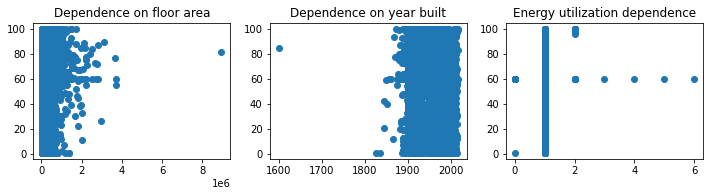

In [63]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(Manhattan['DOF Gross Floor Area'], Manhattan['ENERGY STAR Score'])
ax1.set_title("Dependence on floor area")
ax2.scatter(Manhattan['Year Built'], Manhattan['ENERGY STAR Score'])
ax2.set_title("Dependence on year built")
ax3.scatter(Manhattan['Metered Areas (Energy)'], Manhattan['ENERGY STAR Score'])
ax3.set_title("Energy utilization dependence")

plt.show()

# No conclusion can be made out of this graph

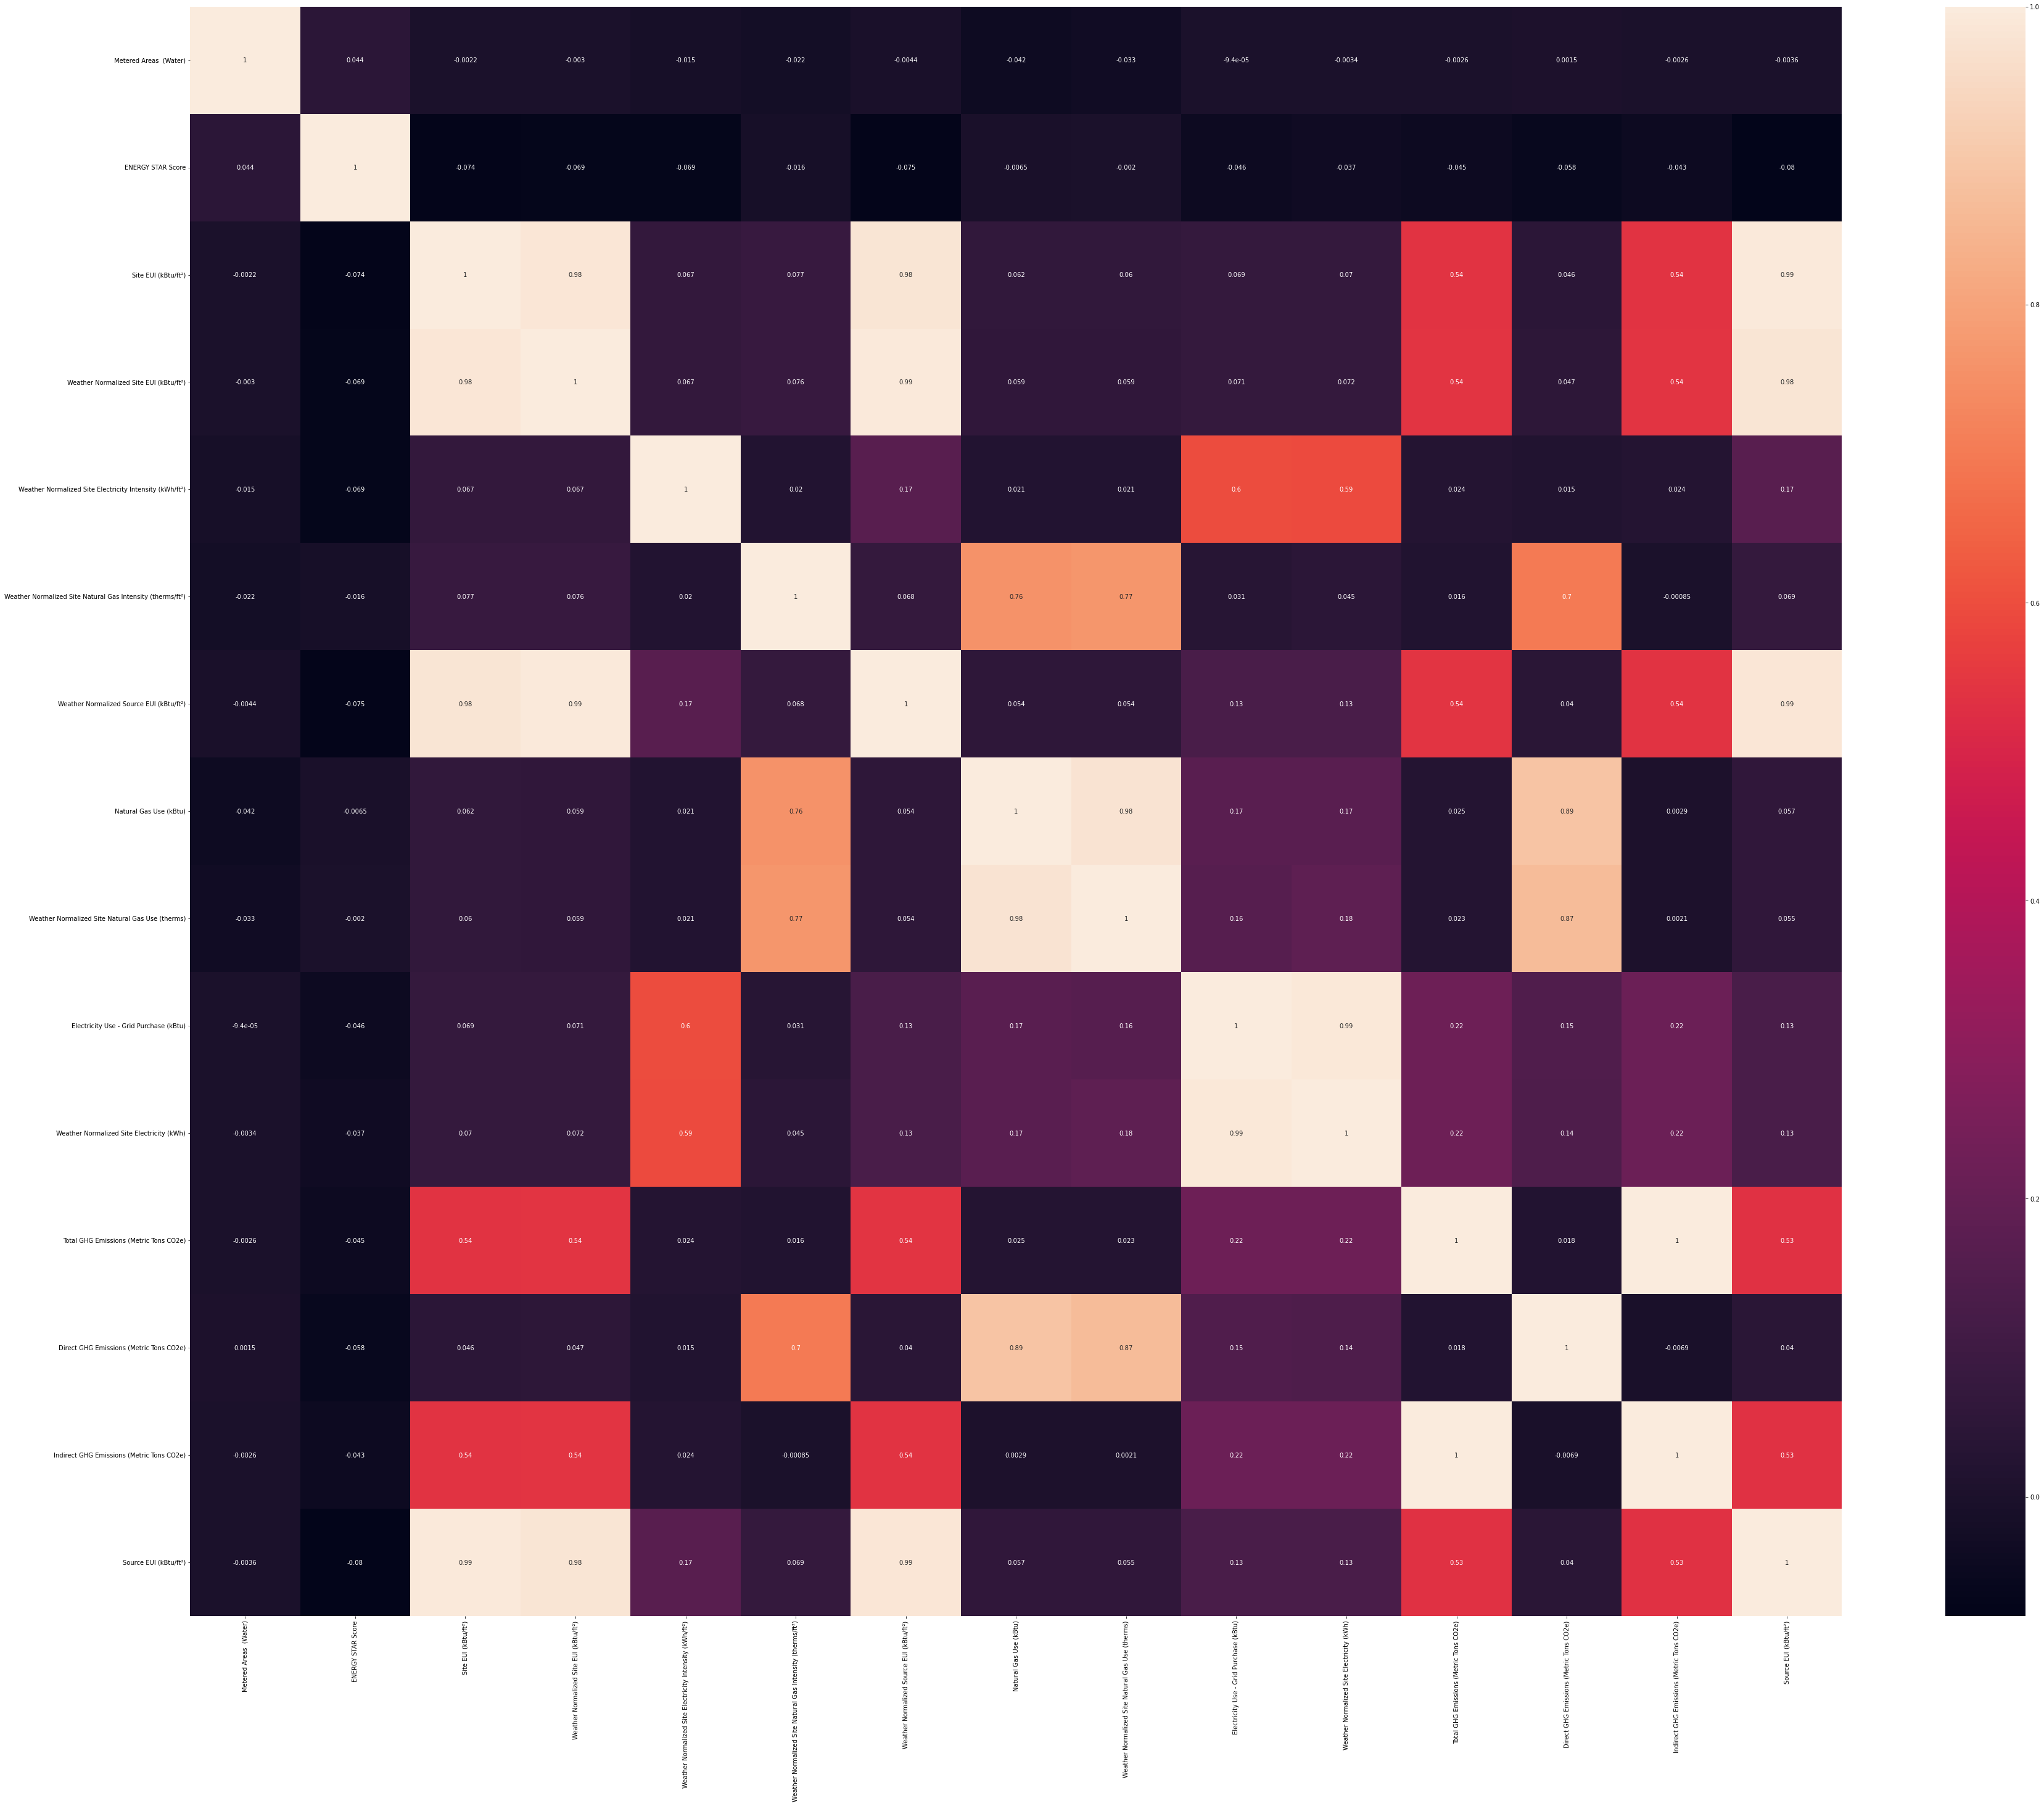

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(60, 48))
sns.heatmap(Manhattan.iloc[:,10:27].corr(),annot=True,)
plt.show()


### Linear Regression starts

In [67]:
import numpy as np

# Assuming X is your NumPy array

# Selecting columns 10 through 26 (exclusive) using slicing
X = Manhattan.iloc[:, 10:26].values

# Removing the 'ENERGY STAR Score' column
column_to_remove = 12  # Assuming the index of 'ENERGY STAR Score' column is 12
X = np.delete(X, column_to_remove, axis=1)

# Now X contains all columns from 10 to 26 except the 'ENERGY STAR Score' column
y = Manhattan.iloc[:,12].values

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [71]:
# Residual
y_pred = model.predict(X_test)
residual = y_test - y_pred

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error: 4.2305314811724756e-10
Mean Squared Error: 1.4798740659435047e-18
Root Mean Squared Error: 1.2165007463801676e-09
R-squared (R²): 1.0
